<a href="https://colab.research.google.com/github/lucianogarim/Analise_Exploratoria_de_Dados_Petrofisica/blob/main/T%C3%B3pico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados para Petrofísica**

Nesta primeira aula iremos abordar o uso de bibliotecas especializadas para petrofísica, com o objetivo de fazer o carregamento de dados em Pyhton.


As seguintes bibliotecas serão utilizadas:

1.   Pandas
2.   Matplotlib
3.   Missingno
4.   Lasio

A seguinte biblioteca deverá ser instalada:

1.   Lasio

In [2]:
# Instalação das bibliotecas
!pip install lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Importação de Dados com a Biblioteca **LASIO**

In [3]:
# URL do conjunto de dados hospedado no GitHub
URL = "https://raw.githubusercontent.com/lucianogarim/Analise_Exploratoria_de_Dados_Petrofisica/refs/heads/main/Po%C3%A7o%20do%20Curso.las"
las = lasio.read(URL)

# Verificar quais curvas estão disponíveis no arquivo
print(las.curves)

Mnemonic     Unit      Value  Description                                                         
--------     ----      -----  -----------                                                         
DEPTH        M                                                                                    
BS           in               Bit Size                                                            
DT           us/ft            Delta-T Compressional                                               
DWAL         kg/kg            Dry Weight Fraction Pseudo Aluminum (SpectroLith WALK2 Model)       
DWCA         kg/kg            Dry Weight Fraction Calcium (SpectroLith WALK2 Model)               
DWFE         kg/kg            Dry Weight Fraction Iron + 0.14 Aluminum (SpectroLith WALK2 Model)  
DWGD         ppm              Dry Weight Fraction Gadolinium (SpectroLith WALK2 Model)            
DWS          kg/kg            Dry Weight Fraction Sulfur (SpectroLith WALK2 Model)                
DWSI      

Quais dados do arquivo .las podem ser acessados com a biblioteca LASIO?

In [4]:
# Para verificar que tipo de dados existem no arquivo usar o comando abaixo
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [10]:
# Versão
print(las.version)

Mnemonic  Unit  Value  Description                               
--------  ----  -----  -----------                               
VERS            2.0    CWLS LOG ASCII STANDARD - VERSION 2.0     
WRAP            NO     ONE LINE PER DEPTH STEP                   
DLM             SPACE  DELIMITING CHARACTER(SPACE TAB OR COMMA)  


In [11]:
# Well
print(las.well)

Mnemonic       Unit     Value             Description                                     
--------       ----     -----             -----------                                     
STRT           M        180.076           First reference value                           
STOP           M        514.747           Last reference value                            
STEP           M        0.152             Step increment                                  
NULL                    -9999             Missing value                                   
COMP                    FANTASIA          Company                                         
WELL                    POCO DO CURSO     Well name                                       
FLD                     CAMPO             Field                                           
LOC                                       Location                                        
CNTY                                      County                                          

In [12]:
# Curves
print(las.curves)

Mnemonic     Unit      Value  Description                                                         
--------     ----      -----  -----------                                                         
DEPTH        M                                                                                    
BS           in               Bit Size                                                            
DT           us/ft            Delta-T Compressional                                               
DWAL         kg/kg            Dry Weight Fraction Pseudo Aluminum (SpectroLith WALK2 Model)       
DWCA         kg/kg            Dry Weight Fraction Calcium (SpectroLith WALK2 Model)               
DWFE         kg/kg            Dry Weight Fraction Iron + 0.14 Aluminum (SpectroLith WALK2 Model)  
DWGD         ppm              Dry Weight Fraction Gadolinium (SpectroLith WALK2 Model)            
DWS          kg/kg            Dry Weight Fraction Sulfur (SpectroLith WALK2 Model)                
DWSI      

In [15]:
# Parameter
print(las.params)

Mnemonic              Unit  Value                            Description  
--------              ----  -----                            -----------  
SET                         BASE                                          
TLFAMILY_BS                 Bit Size                                      
TLFAMILY_DT                 Compressional Slowness                        
TLFAMILY_DWAL               Aluminum Weight Fraction                      
TLFAMILY_DWCA               Calcium Weight Fraction                       
TLFAMILY_DWFE               Iron Weight Fraction                          
TLFAMILY_DWGD               Gadolinium Weight Fraction                    
TLFAMILY_DWS                Sulfur Weight Fraction                        
TLFAMILY_DWSI               Silicon Weight Fraction                       
TLFAMILY_DWTI               Titanium Weight Fraction                      
TLFAMILY_GR                 Gamma Ray                                     
TLFAMILY_GRT             

Para mais informações sobre essa biblioteca acesse: [LASIO](https://lasio.readthedocs.io/en/latest/index.html)

# Conversão dos Dados para Uso na Biblioteca **Pandas**

In [35]:
# Transformação do formato .las para dataframe(específico para Python)
df = las.df().reset_index()

df.head()

,DEPTH,BS,DT,DWAL,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
0,5180.076,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,4896.684
1,5180.229,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4896.822
2,5180.381,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4896.960
3,5180.533,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4897.098
4,5180.686,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4897.236


In [24]:
# Mostrar os nomes de todas as colunas
df.columns

Index(['DEPTH', 'BS', 'DT', 'DWAL', 'DWCA', 'DWFE', 'DWGD', 'DWS', 'DWSI',
       'DWTI', 'GR', 'GRT', 'HCAL', 'HDRA', 'HFK', 'HTHO', 'HURA', 'KSDR',
       'KTIM', 'NMRE_FINAL', 'NMRFL_FINAL', 'NMRT_FINAL', 'NPHI', 'PE', 'RD',
       'RHOB', 'RM', 'RS', 'T2LM', 'TVDSS'],
      dtype='object')

In [22]:
# Verificar tipos de dados de cada coluna (float64, object, int64, etc)
df.dtypes

,0
DEPTH,float64
BS,float64
DT,float64
DWAL,float64
DWCA,float64
DWFE,float64
DWGD,float64
DWS,float64
DWSI,float64
DWTI,float64


# Análise Exploratória de Valores Nulos

In [27]:
# Verificando a quantidade de valores nulos.
df.isnull().sum()

,0
DEPTH,0
BS,171
DT,4
DWAL,171
DWCA,171
DWFE,171
DWGD,171
DWS,171
DWSI,171
DWTI,171


<Axes: >

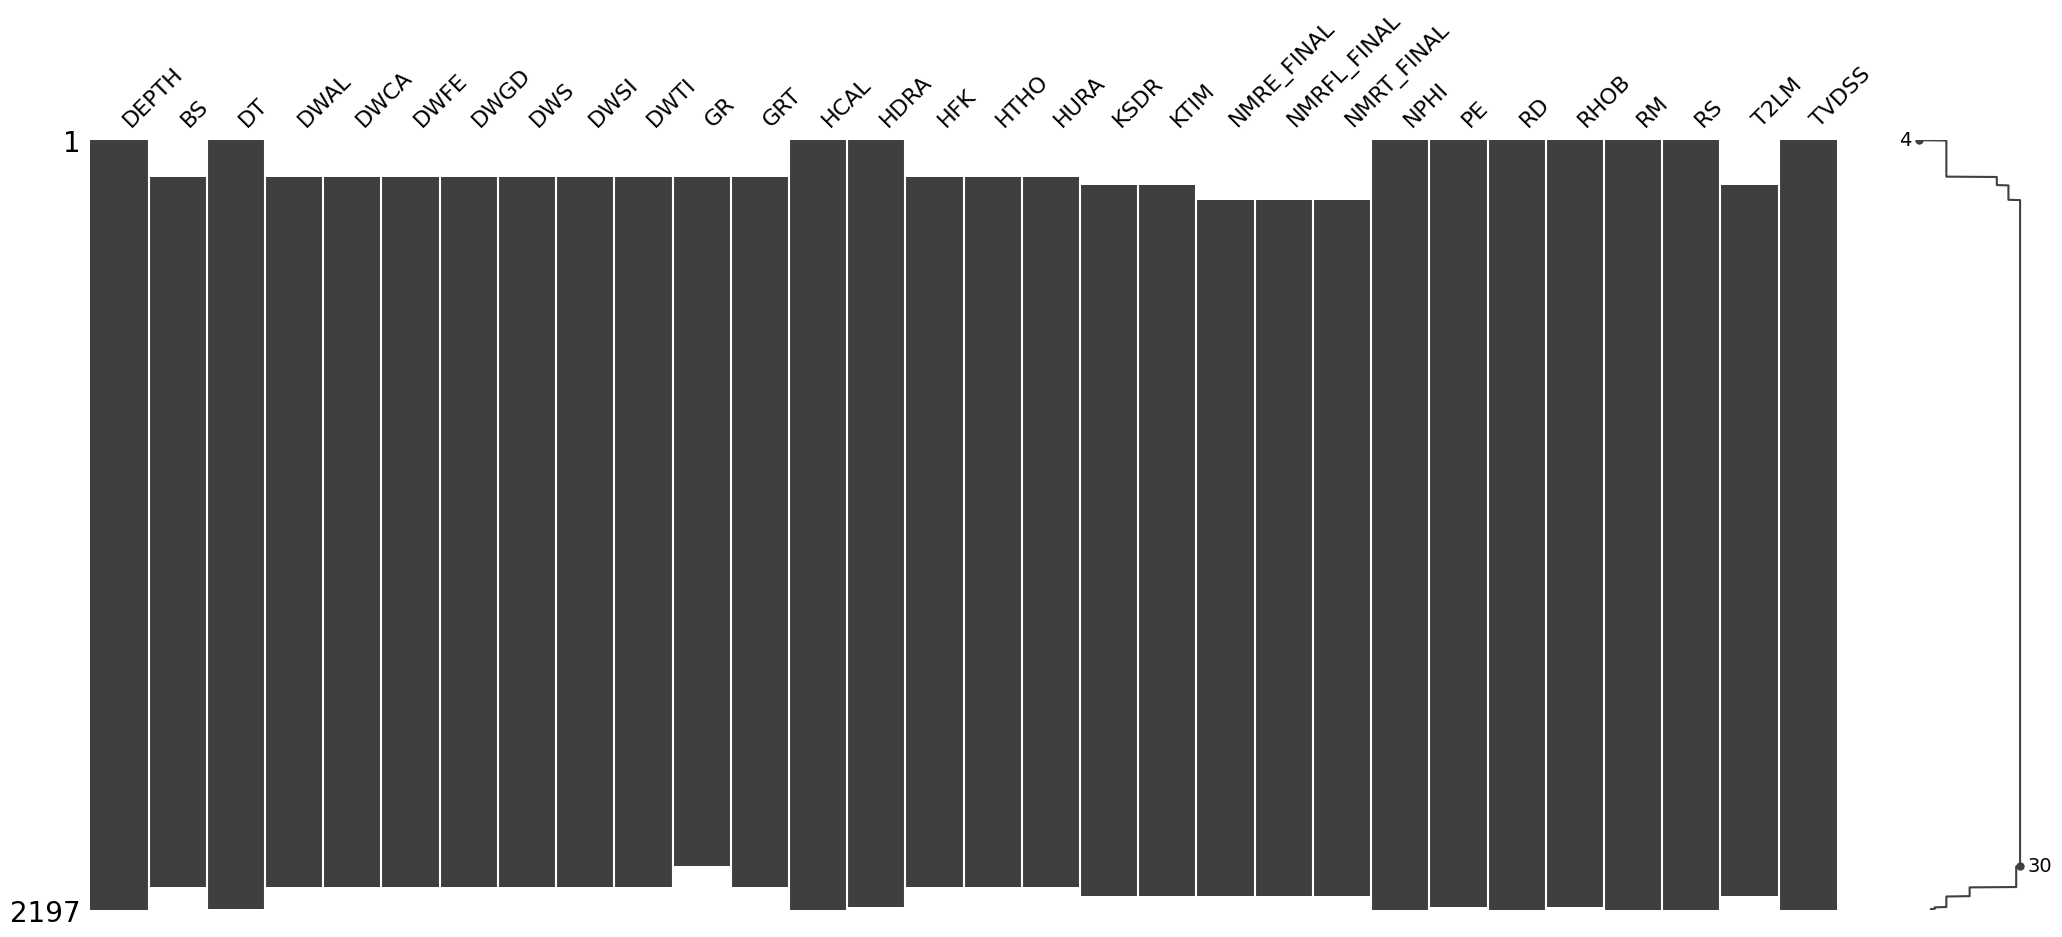

In [39]:
# Identificando onde estão localizados os valores nulos
msno.matrix(df)

<Axes: >

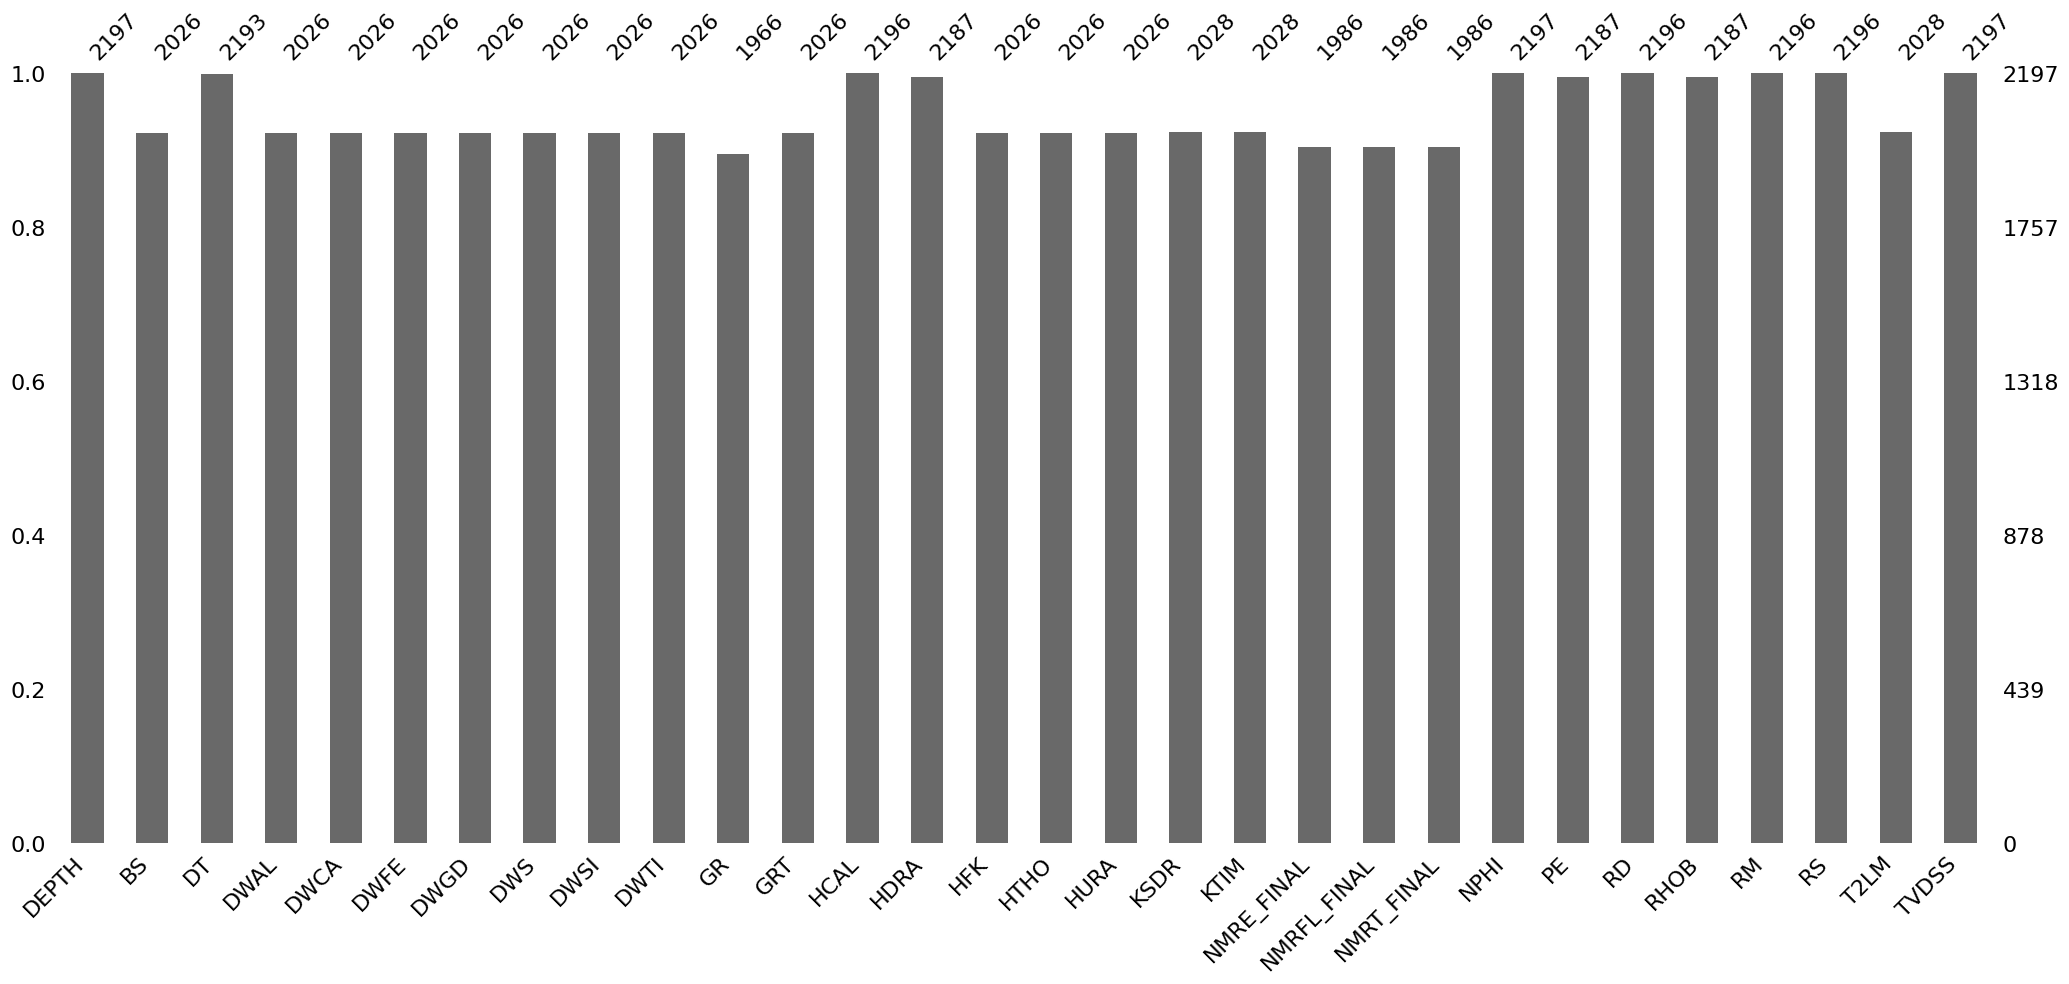

In [38]:
# Verificando a quantidade de valores não-nulos
msno.bar(df)

O que fazer com os valores nulos?



1.   Excluir a coluna dos dados
2.   Substituir por algum valor válido

  *   Valor arbitrário
  *   Media, mediana ou moda (no caso de categóricos)
  *   Interpolações
  *   Filtrar os dados por uma profundidade válida





In [42]:
# Vamos criar uma cópia dos nossos dados e realizar os experimentos sem alterar os dados originais
df_copia = df.copy()

# Excluindo coluna com nulos (Por exemplo: DWAL)
df_copia.drop(columns=['DWAL'], inplace=True)
df_copia.head()

,DEPTH,BS,DT,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,GR,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
0,5180.076,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,4896.684
1,5180.229,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4896.822
2,5180.381,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4896.960
3,5180.533,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4897.098
4,5180.686,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4897.236


In [43]:
# Substituir um nulo por um número
df_copia['GR'].fillna(0, inplace=True)
df_copia.head()

/tmp/ipython-input-345472597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['GR'].fillna(0, inplace=True)


,DEPTH,BS,DT,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,GR,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
0,5180.076,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,4896.684
1,5180.229,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4896.822
2,5180.381,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4896.960
3,5180.533,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4897.098
4,5180.686,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.0,NaN,4897.236


In [45]:
# Substituir um nulo pela media
df_copia['RHOB'].fillna(df_copia['RHOB'].mean(), inplace=True)
df_copia.head()

/tmp/ipython-input-4028785654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['RHOB'].fillna(df_copia['RHOB'].mean(), inplace=True)


,DEPTH,BS,DT,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,GR,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
0,5180.076,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,NaN,NaN,2.553209,NaN,NaN,NaN,4896.684
1,5180.229,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4896.822
2,5180.381,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4896.960
3,5180.533,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4897.098
4,5180.686,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4897.236


In [46]:
# Substituir um nulo por interpolações
df_copia['DWCA'].interpolate(method='linear', inplace=True)
df_copia.head()

# Atenção a interpolação não funciona para valores no topo nem na base, pois necessita de pelo menos dois pontos válidos para interpolar um intermediário.

/tmp/ipython-input-3983880520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['DWCA'].interpolate(method='linear', inplace=True)


,DEPTH,BS,DT,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,GR,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
0,5180.076,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,NaN,NaN,2.553209,NaN,NaN,NaN,4896.684
1,5180.229,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4896.822
2,5180.381,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4896.960
3,5180.533,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4897.098
4,5180.686,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,-0.016,10.0,407.215,4.629000,246.206,1950.0,NaN,4897.236


In [60]:
# Substituir nulos filtrando pela coluna DEPTH
df_copia = df_copia[(df_copia['DEPTH']>=5206)&(df_copia['DEPTH']<=5504)]
df_copia

,DEPTH,BS,DT,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,GR,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
171,5206.137,12.25,58.574,0.259,0.001,0.000,0.039,0.142,0.0,26.817,...,0.000,0.026,0.054,6.934,344.169,2.740,178.240,804.265,13.557,4920.424
172,5206.289,12.25,60.515,0.230,0.002,0.000,0.034,0.176,0.0,36.808,...,0.000,0.017,0.069,5.748,296.665,2.671,175.440,747.899,3.751,4920.563
173,5206.441,12.25,61.126,0.212,0.002,0.000,0.032,0.199,0.0,43.772,...,0.000,0.020,0.097,4.984,223.558,2.606,151.759,1632.623,1.931,4920.703
174,5206.594,12.25,62.994,0.224,0.003,0.000,0.028,0.183,0.0,44.721,...,0.000,0.029,0.120,4.658,166.852,2.555,131.178,1250.840,1.410,4920.842
175,5206.746,12.25,65.213,0.255,0.004,2.197,0.019,0.150,0.0,37.548,...,0.007,0.051,0.157,4.750,95.657,2.511,80.562,1498.745,2.037,4920.981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,5503.316,12.25,65.550,0.331,0.013,0.000,0.000,0.043,0.0,0.000,...,0.126,0.171,0.223,5.340,1.474,2.446,1.491,1.951,208.563,5195.193
2122,5503.469,12.25,65.550,0.331,0.013,0.000,0.000,0.043,0.0,0.000,...,0.139,0.177,0.223,5.340,1.495,2.446,1.508,1.949,314.855,5195.334
2123,5503.621,12.25,65.550,0.331,0.013,0.000,0.000,0.043,0.0,0.000,...,0.141,0.172,0.223,5.340,1.536,2.446,1.541,1.978,337.573,5195.475
2124,5503.773,12.25,65.550,0.331,0.013,0.000,0.000,0.043,0.0,0.000,...,0.139,0.166,0.223,5.340,1.540,2.446,1.531,1.987,336.800,5195.616
